# 2022 Running Analysis


In [25]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join('../stravadataanalysis'))
sys.path.insert(0, module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from stravadataanalysis.src.repository import data_loader

activities = data_loader.load_activities("../data/activities")
runs = activities[activities['type'] == 'Run']
runs = activities[(activities['start_date'] >= '2022-01-01') & (activities['start_date'] < '2023-01-01')]


## 2022 Highlight

In [27]:
from stravadataanalysis.src.view import data_format

runs_2022 =runs[['id', 'start_date', 'name', 'distance', 'elapsed_time', 'average_speed', 'total_elevation_gain']]\
  .sort_values('distance', ascending=False)
runs_2022['distance_overview'] = runs_2022['distance'].apply(data_format.m_as_km)
runs_2022['elapsed_time_overview'] = runs_2022['elapsed_time'].apply(data_format.seconds_as_hhmmss)
runs_2022['average_speed_overview'] = runs_2022['average_speed'].apply(data_format.mps_as_minpkm)
runs_2022['total_elevation_gain_overview'] = runs_2022['total_elevation_gain'].apply(data_format.m)
display(runs_2022[['name', 'distance_overview', 'elapsed_time_overview', 'average_speed_overview', 'total_elevation_gain_overview', 'start_date']])


,name,distance_overview,elapsed_time_overview,average_speed_overview,total_elevation_gain_overview,start_date
285,Sortie vélo le matin,28.28km,11:52:01,2:52min/km,166m,2022-06-07T06:09:57Z
50,Sortie vélo dans l'après-midi,22.5km,01:09:26,2:53min/km,152m,2022-11-13T14:53:07Z
5,Course à pied l'après-midi,21.34km,01:50:38,5:10min/km,121m,2022-03-13T15:21:44Z
8,Foulées du Numérique 2022,19.25km,01:33:47,4:52min/km,13m,2022-09-18T07:48:00Z
304,Henvic / Sentier Côtier à Carantec,18.89km,01:45:04,5:32min/km,263m,2022-04-17T15:00:17Z
...,...,...,...,...,...,...
167,Course à pied dans l'après-midi,8.62km,00:44:59,5:13min/km,0m,2022-09-04T15:39:12Z
232,Course à pied le matin,7.75km,00:44:27,5:32min/km,46m,2022-07-12T04:51:23Z
161,Course à pied le matin,5.66km,00:38:20,6:46min/km,58m,2022-12-26T09:09:11Z
158,Marche dans l'après-midi,2.55km,00:44:52,16:48min/km,23m,2022-08-18T12:10:59Z


In [28]:
from stravadataanalysis.src.view import data_format
from stravadataanalysis.src.domain import highlights
import pandas as pd

highlights_requests = [
    highlights.Highlight('max_distance', 'distance', display_function=data_format.m_as_km),
    highlights.Highlight('max_duration', 'elapsed_time', display_function=lambda x: data_format.seconds_as_hhmmss(int(x))),
    highlights.Highlight('max_elevation_gain', 'total_elevation_gain', display_function=data_format.m),
    highlights.Highlight('earlier_run', 'start_time', ascending_sort_order=True),
    highlights.Highlight('max_average_speed', 'average_speed', data_format.mps_as_minpkm),
    highlights.Highlight('max_top_heartrate', 'max_heartrate', data_format.bpm),
]

columns = ["highlight", "value", "name", "start_date_local", "id"]

highlights_2022 = []
for highlight_request in highlights_requests:
    highlight = highlight_request.transform(runs)
    highlights_2022.append(highlight)

pd.DataFrame(highlights_2022, columns=columns)

,highlight,value,name,start_date_local,id
285,max_distance,28.28km,Sortie vélo le matin,2022-06-07T08:09:57Z,7271186757
128,max_duration,12:45:38,Sortie vélo le matin,2022-11-29T08:42:22Z,8186387252
304,max_elevation_gain,263m,Henvic / Sentier Côtier à Carantec,2022-04-17T17:00:17Z,6997761739
232,earlier_run,06:51:23,Course à pied le matin,2022-07-12T06:51:23Z,7454700738
169,max_average_speed,2:41min/km,Sortie à vélo le midi,2022-05-13T12:16:11Z,7152798737
119,max_top_heartrate,204bpm,Côtes à Chantenay,2022-11-10T12:10:37Z,8096506459


# Distance run

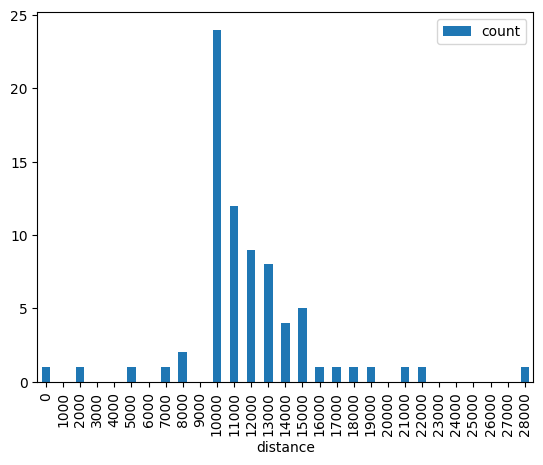

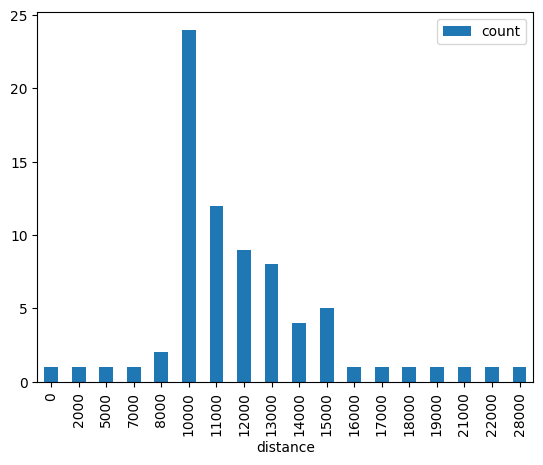

In [29]:
from stravadataanalysis.src.domain.distances import get_distance_distribution
from stravadataanalysis.src.view.plot import plot_distance_distribution

distance_distribution = get_distance_distribution(runs, 1000)

plot_distance_distribution(distance_distribution, True)
plot_distance_distribution(distance_distribution, False)

## Segments
Top 10 segments of the year :

,id,count,name
123,20310261,30,passage à côté du stade jusqu'au terrain de te...
60,13276220,17,Retour depuis pont
120,20263817,15,vers aire de jeu du parc de la Chézine
11,5403095,15,1km Chezine
118,20263702,14,Chézine partie sud du circuit principal
112,19642112,13,chez moi
139,22650322,13,Bassin de la Chezine --> 2ème pont
25,6899362,13,Montée de l'Avenue des Acacias
122,20310176,12,La Gourmette vers bout du lac
13,5472005,12,Dervallieres-Desgrées du lou


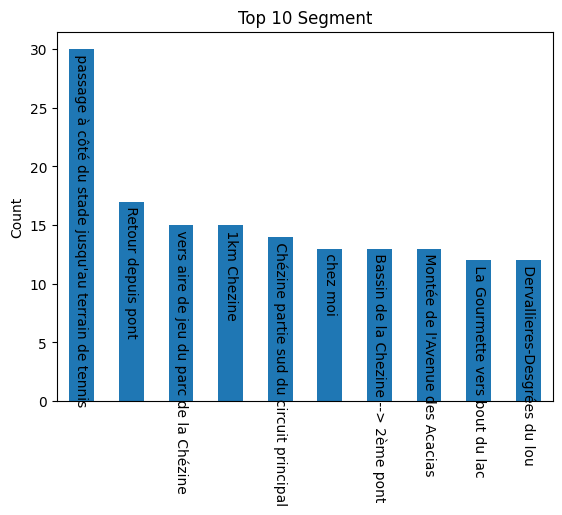

In [30]:
from stravadataanalysis.src.domain import segments
from stravadataanalysis.src.view import plot

top_10_segments = segments.get_top_10_segments(runs)

display(top_10_segments)

plot.plot_top_segments_bar(top_10_segments)


## Split metrics

Evolution of some metrics during my runs :
* speed
* heart rate

> NOTE: Training runs (Strava's workout_type 3) are excluded from the analysis because split runs create split metrics with various interval and the goal is to compare each km.

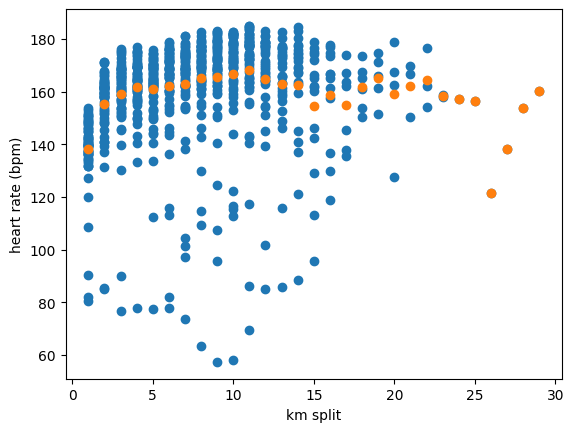

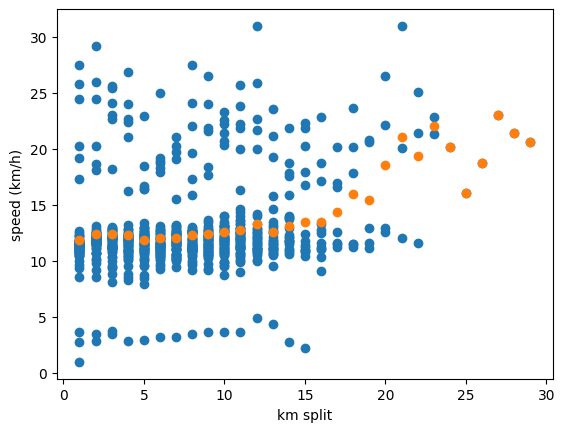

In [31]:
from stravadataanalysis.src.domain import split_metrics
from stravadataanalysis.src.view import plot

runs_activities = runs[runs['workout_type'] != 3].reset_index()
metrics = split_metrics.extract_split_metrics(runs_activities)

plot.plot_split_metric_heartrate(metrics['value'], metrics['means'])
plot.plot_split_metric_speed(metrics['value'], metrics['means'])